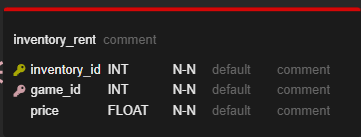

In [6]:
import pandas as pd
import random
import numpy as np
import openpyxl
from scipy.special import softmax

In [11]:
games = pd.read_excel('games.xlsx')

In [99]:
games.tail()

,game_id,name,PEGI,min_players,max_players,category,duration,rating
45,46,Balkan Hell,12,2,2,Wargames,120,6.11628
46,47,Kakuro Challenge,7,2,4,Abstract Games,30,5.51522
47,48,Tashkent Domino,8,2,2,Abstract Games,10,5.56579
48,49,The Last Banquet,10,6,25,Party Games,45,5.50509
49,50,Inner Circle,8,2,4,Abstract Games,20,5.39520


In [111]:
num_games_id = 50
all_items = 500

In [112]:
possible_players = [1, 2, 3, 4, 5]
probs = [0.2, 0.4, 0, 0.3, 0.1] #nie mamy gier na max 3 graczy
np.random.seed(42)

n_players = np.random.choice([1, 2, 3, 4, 5], size = all_items, p=probs) #losujemy ile bd 1, ile 2, ile 3 itd

In [116]:
def exchange_players_to_game_id(df, n_players):
    game_id = []
    for i in range(1, 6):
        n = (n_players == i).sum()
        if i == 5:
            prob_r = softmax(games.loc[games['max_players'] >= i, 'rating'].values)
            simulated_id = list(np.random.choice(games.loc[games['max_players'] >= i, 'game_id'].values, p = prob_r, size = n))
            game_id += simulated_id
        else:
            if len(games.loc[games['max_players'] == i, 'rating'].values) != 0:
                prob_r = softmax(games.loc[games['max_players'] == i, 'rating'].values)
                simulated_id = list(np.random.choice(games.loc[games['max_players'] == i, 'game_id'].values, p = prob_r, size = n))
                game_id += simulated_id
    return game_id

In [117]:
len(exchange_players_to_game_id(games, n_players)) #wygenerowane game_ids do tabeli inventory_rent

500

In [127]:
#dobra narazie chamskie ceny
prices = list(np.random.choice(np.arange(3,25), size = 500))

In [126]:
game_ids = shuffle(exchange_players_to_game_id(games, n_players)

In [128]:
data = {'game_id' : game_ids,
        'price' : prices,
        }

In [130]:
inventory_rent = pd.DataFrame(data)
inventory_rent

,game_id,price
0,22,23
1,13,4
2,13,20
3,13,17
4,13,3
...,...,...
495,2,7
496,31,12
497,3,11
498,2,15


In [131]:
inventory_rent.to_csv('inventory_rent.csv')